In [581]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from numpy import log as ln
from termcolor import colored
from scipy.stats.mstats import gmean 

Método que grafica un diagrama de barras

In [582]:
def bar_plot(x,name):
    plt.figure(figsize=(12,5))
    ax = plt.subplot()
    ax = sns.barplot(x=data[x].value_counts().index, y=data[x].value_counts(), data=data,edgecolor='black', color='gray')
    ax.set_xlabel(name,size=20)
    ax.set_ylabel('frecuencia ni',size=15)
    ax.set_title(f'Diagrama de barras {name}',size=15)
    plt.show()

Método que grafica una ojiva y el histograma

In [583]:
def hist_Ogive_plot(x,m,name):
    plt.figure(figsize=(12,5))
    ax = plt.subplot(121)
    sns.distplot(data[x], bins=m, kde=False,color='gray')
    ax.axvline(data[x].mean(), c='r', linestyle = '--', label = 'Promedio')
    ax.axvline(data[x].median(), c='b', linestyle = '--', label = 'Mediana')
    ax.set_title(f"Histograma de {name}",size=20)
    ax.set_ylabel('Frecuencia Absoluta ni',size=15)
    ax.set_xlabel(name,size=15)
    ax.legend()
    ax = plt.subplot(122)
    sns.distplot(data[x], bins=m, kde_kws=dict(cumulative=True), color='gray')
    ax.set_title(f"Diagrama de Ojiva de {name}",size=15)
    ax.set_ylabel('Freacuencia Relativa Acumulada Fi',size=15)
    ax.set_xlabel(name,size=12)

In [584]:
def box_plot_B(name,serie):
    ax = sns.boxplot(x=serie,color='red')
    ax.set_title(f'Diagrama de cajas de {name}')
    ax.set_xlabel(name)

Grafica un digrama de caja

In [585]:
def box_plot(x,name):
    plt.figure(figsize=(10,5))
    ax = plt.subplot()
    ax = sns.boxplot(x=data[x], color='gray')
    ax.set_title(f'Diagrama de cajas de {name}',size=20)
    ax.set_xlabel(name,size=15)

Determina el número de intervalos que debe tener la tabla de frecuencias

In [586]:
def intervals_class(N):
    m1 = np.sqrt(N)
    m2 = 1+3.3*np.log10(N)
    m3 = ln(N)/ln(2)
    return [m1,m2,m3] 

Método que crea los intervalos que debe tener la tabla de frecuencias

In [587]:
def made_intervals_class(x, m,date,t):
    range_i =  date[x].max() - date[x].min()
    amplitude = range_i/m
    tupla = (range_i,np.rint(amplitude)) 
    if t == 1:
        tupla = (range_i,np.round(amplitude,5))
    return tupla

Método que crea la marca de clase

In [588]:
def class_mark(intervale,c):
    f_value = np.round((intervale[0][1]+intervale[0][0])/2,5)
    m_values = []
    m_values.append(f_value)
    for i in range(len(intervale)-1):
        f_value = np.round(f_value + c,5)
        m_values.append(f_value)
    return m_values

Crea tabla de frecuencia para datos cuantitativos

In [589]:
def made_frequency_table_A(x, date,t,name):
    
    m = int(np.rint(np.array(intervals_class(date[x].shape[0])).min()))
    temp = made_intervals_class(x, m,date,t)
    r = temp[0]
    c = temp[1]
    intervale = []
    n = data[x].min()
    for i in range(m):
        if i < m-1:
            intervale.append((n,np.around(n+c,5)))
            n = np.around(n+c,5)
        else:
            intervale.append((n,np.around(n+c,5)+(data[x].max()-(np.around(n+c,5)))))
    
    alfa = date[x]
    alfa = alfa.sort_values()
    
    ni = []
    for i in range(m):
        if i==0:
            a = alfa[alfa <= intervale[i][1]]
            ni.append(len(a))
        else:
            a = alfa[(alfa > intervale[i][0]) & (alfa<=intervale[i][1])]
            ni.append(len(a))
    dic = {name:intervale,'ni':ni}
    dic = pd.DataFrame(dic)
    total = dic['ni'].sum()
    dic['fi'] = dic['ni']/total
    dic['Ni'] = np.cumsum(dic['ni'])
    dic['Fi'] = np.cumsum(dic['fi'])
    dic['Xí'] = class_mark(intervale,c)
    dic.loc[str(m)] = ['Total',total,' ',' ',' ',' ']
    return dic    

Crea tabla de frecuencia para datos categoricos

In [590]:
def made_frequency_table_B(x,date,m):
    
    intervale = []
    ni = []
    intervale = list(date[x].unique())
    ni = list(date[x].value_counts(dropna = False).values)
    dic = pd.DataFrame()
    total = np.sum(ni)
    dic[m] = intervale
    dic['ni'] = ni
    dic['fi'] = np.round(dic['ni']/total,5)
    dic['Ni'] = np.cumsum(dic['ni'])
    dic['Fi'] = np.cumsum(dic['fi'])
    dic.loc[len(ni)+1] = ['Total',total,' ',' ',' ']
    return dic

Calcula el coeficiente de asimetria y de curtosis de la distribución

In [591]:
def is_asimetric_curtosis(columna):
    asimetria = columna.skew()
    curtosis = columna.kurt()
    message = ''
    message_2 = ''
    if asimetria == 0:
        message = 'Asimetrica'
    elif asimetria > 0:
        message = 'Asimetrica con cola hacia la derecha'
    else:
        message = 'Asimetrica con cola hacia la izquierda'
    
    if curtosis == 3:
        message_2 = 'Mesocúrtica'
    elif asimetria > 3:
        message_2 = 'Leptocúrtica'
    else:
        message_2 = 'Platicúrtica'
    return asimetria, curtosis, message, message_2

In [592]:
print(colored(f'Intaciamos data data frame de los indicadores para datos', attrs=['bold']))
columns = ['X','Me','Mg','Mo','Fr','R','Min','Max','§2','S','CV','Q1','Q2','Q3','Ls','Li','RIC','Outliers','per_out','A','CK']
indices = ['type','pr','flg', 'cryptocurrency','td','sp', 'dp', 'ipkt', 'ibyt']
features_No_Agrupadas = pd.DataFrame(0,columns = columns, index=indices)
features_Agrupadas =  pd.DataFrame(0,columns = columns, index=indices)

Intaciamos data data frame de los indicadores para datos


In [593]:
def summary_descriptivo(ind,col,val):
    features_No_Agrupadas.loc[ind,col] = val

In [594]:
def summary_descriptivo_Agrupy(ind,col,val):
    features_Agrupadas.loc[ind,col] = val

# Preparación de los datos
#### Descripción de las caracteristicas ('features')
- ts:     Hora de inicio del flujo
- te:     Hora de finalización del flujo
- td:     Duración del flujo
- sa:     Dirección IP origen
- da:     Dirección IP de destino
- sp:     Puerto de origen
- dp:     Puerto de destino
- pr:     Protocolo
- flg:    Banderas
- fwd:    Estado de reenvío
- stos:   Tipo de servicio de origen
- ipkt:   Paquetes de entrada
- ibyt:   Bytes de entrada
- opkt:   Paquetes de salida
- obyt:   Bytes de salida
- in:     Interfaz de entrada
- out:    Interfaz de salida
- sas:    Número de sistema autónomo BGP de origen
- das:    Número de sistema autónomo BGP de destino
- smk:    Máscara de red de origen
- dmk:    Máscara de red de destino
- dtos:   Tipo de servicio de destino
- dir:    Dirección del flujo
- nh:     Enrutador de siguiente salto
- nhb:    Enrutador de siguiente salto BGP
- svln:   VLAN de origen
- dvln:   VLAN de destino
- ismc:   Dirección MAC de la fuente de entrada   
- odmc:   Dirección MAC de destino de salida
- idmc:   Introduzca la dirección MAC de destino
- osmc:   Dirección MAC de la fuente de salida
- mpls1:  Etiqueta MPLS 1
- mpls2:  Etiqueta MPLS 2
- mpls3:  Etiqueta MPLS 3
- mpls4:  Etiqueta MPLS 4
- mpls5:  Etiqueta MPLS 5
- mpls6:  Etiqueta MPLS 6
- mpls7:  Etiqueta MPLS 7
- mpls8:  Etiqueta MPLS 8
- mpls9:  Etiqueta MPLS 9
- mpls10: Etiqueta MPLS 10
- cl:     Latencia del cliente
- sl:     Latencia del servidor
- al:     Latencia de la aplicación
- ra:     Exportando la dirección IP del sistema (enrutador)
- eng:    Tipo / ID de motor
- exid:   Exportando el ID del sistema
- tr:     Marca de tiempo de flujo recibido
- type:   Tipo de registro Mina/ no Mina 
- cryptocurrency: : Tipo criptomoneda
- id_Cryptocurrency:: Id Criptomoneda

In [595]:
print(colored(f'Cargamos los datos', attrs=['bold']))
data = pd.read_csv('./dataA.csv')
data.head()

Cargamos los datos


,index,References,ts,te,td,sa,da,sp,dp,pr,...,mpls10,cl,sl,al,ra,eng,exid,tr,cryptocurrency,type
0,99020,319-csves/1.csv,2020-09-12 15:29:52,2020-09-12 15:29:52,0.000,192.168.0.1,192.168.0.13,53.0,52947.0,UDP,...,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,0.0,1969-12-31 19:00:00.000,Does_not_have,not_mine
1,122925,387-csves/0.csv,2020-09-12 22:58:30,2020-09-12 22:58:30,0.580,192.168.0.12,239.255.255.250,41213.0,1900.0,UDP,...,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,0.0,1969-12-31 19:00:00.000,Does_not_have,not_mine
2,261357,764-csves/1.csv,2020-09-16 22:25:21,2020-09-16 22:25:21,0.000,192.168.0.13,192.168.0.1,52109.0,53.0,UDP,...,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,0.0,1969-12-31 19:00:00.000,Does_not_have,not_mine
3,26581,101-csves/1.csv,2020-09-10 04:01:12,2020-09-10 04:02:44,92.252,172.217.30.206,192.168.0.13,443.0,40096.0,TCP,...,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,0.0,1969-12-31 19:00:00.000,Does_not_have,not_mine
4,32874,130-csves/0.csv,2020-09-10 06:48:02,2020-09-10 06:48:02,0.000,104.18.226.52,192.168.0.13,443.0,51808.0,TCP,...,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,0.0,1969-12-31 19:00:00.000,Does_not_have,not_mine


# Análisis inicial

In [1]:
print(colored(f'Observamos el número de registros en total, cuantos valores hay por columnas, así como sus valores nulos y el tipo de dato de cada columna', attrs=['bold']))
data.info()

NameError: name 'colored' is not defined

In [597]:
print(colored(f'El conjunto de datos consta de {len(data.index)} registros y {len(data.columns)} columnas', attrs=['bold']))

El conjunto de datos consta de 465084 registros y 52 columnas


### Inspección datos faltantes

In [598]:
print(colored(f'Valores faltantes por columnas, (False: Valores no nulos), (True: Valores nulos)', attrs=['bold']))
avaliable = data.isnull()
avaliable.apply(pd.Series.value_counts).T

Valores faltantes por columnas, (False: Valores no nulos), (True: Valores nulos)


,False,True
index,465084.0,NaN
References,465084.0,NaN
ts,465084.0,NaN
te,464976.0,108.0
td,464976.0,108.0
sa,464976.0,108.0
da,464976.0,108.0
sp,464976.0,108.0
dp,464976.0,108.0
pr,464976.0,108.0


In [599]:
d = ['te', 'td', 'sa', 'da', 'sp', 'dp', 'pr','flg', 'fwd', 'stos', 'ipkt', 'ibyt', 'opkt', 'obyt', 'in', 'out','sas', 'das', 'smk', 'dmk', 'dtos', 'dir', 'nh', 'nhb', 'svln', 'dvln','ismc', 'odmc', 'idmc', 'osmc', 'mpls1', 'mpls2', 'mpls3', 'mpls4',
'mpls5', 'mpls6', 'mpls7', 'mpls8', 'mpls9', 'mpls10', 'cl', 'sl', 'al','ra', 'eng', 'exid', 'tr']

In [600]:
data_concidencias = []
for i in range(len(d)):
    if i < len(d)-1:
        v = (data[data[d[i]].isnull()].index == data[data[d[i+1]].isnull()].index).all()
        t = (d[i],d[i+1], v)
        data_concidencias.append(t)

print(colored(f'Los valores nulos se distribullen en los mismos registros', attrs=['bold']))
data_concidencias

Los valores nulos se distribullen en los mismos registros


[('te', 'td', True),
 ('td', 'sa', True),
 ('sa', 'da', True),
 ('da', 'sp', True),
 ('sp', 'dp', True),
 ('dp', 'pr', True),
 ('pr', 'flg', True),
 ('flg', 'fwd', True),
 ('fwd', 'stos', True),
 ('stos', 'ipkt', True),
 ('ipkt', 'ibyt', True),
 ('ibyt', 'opkt', True),
 ('opkt', 'obyt', True),
 ('obyt', 'in', True),
 ('in', 'out', True),
 ('out', 'sas', True),
 ('sas', 'das', True),
 ('das', 'smk', True),
 ('smk', 'dmk', True),
 ('dmk', 'dtos', True),
 ('dtos', 'dir', True),
 ('dir', 'nh', True),
 ('nh', 'nhb', True),
 ('nhb', 'svln', True),
 ('svln', 'dvln', True),
 ('dvln', 'ismc', True),
 ('ismc', 'odmc', True),
 ('odmc', 'idmc', True),
 ('idmc', 'osmc', True),
 ('osmc', 'mpls1', True),
 ('mpls1', 'mpls2', True),
 ('mpls2', 'mpls3', True),
 ('mpls3', 'mpls4', True),
 ('mpls4', 'mpls5', True),
 ('mpls5', 'mpls6', True),
 ('mpls6', 'mpls7', True),
 ('mpls7', 'mpls8', True),
 ('mpls8', 'mpls9', True),
 ('mpls9', 'mpls10', True),
 ('mpls10', 'cl', True),
 ('cl', 'sl', True),
 ('sl', 'al

In [601]:
avaliable =  data.notnull()
avaliable = avaliable.all(axis=1).value_counts()

In [602]:
print(colored(f'Eliminamos los datos faltantes, ya que se concentran en los mismos registros y tan solo representan un {(avaliable[0]/avaliable[1])*100}% de los datos. Quedaron {data.shape[0] - avaliable[0]} registros', attrs=['bold']))

Eliminamos los datos faltantes, ya que se concentran en los mismos registros y tan solo representan un 0.02322700526478786% de los datos. Quedaron 464976 registros


In [603]:
data = data.dropna()

### Inspección de tipo de dato incorrecto
Analizo que las columnas tuvieran un tipo de dato acorde a su naturaleza. Me concentrare en datos que tengan por lo menos dos valores en los registros, puesto que hay varias categorías con un solo valor.

<font color="blue"><b><h2> Análisis</h2> </font>
Las variables: puerto de origen (sp), puerto de destino (dp), paquetes de entrada(ipkt) y número de bytes de entrada (ibyte), son de naturaleza discreta y no continuas. Por el motivo anterior le cambio el tipo de dato a un discreto.

In [604]:
data = data.astype({'sp':'int64'})
data = data.astype({'dp':'int64'})
data = data.astype({'ipkt':'int64'})
data = data.astype({'ibyt':'int64'})

### Estructuración del conjunto de datos
Agrupo las columnas de tipo discretas(int64), continuas(float64) y categóricas(object) por separado, para hacer una análisis más organizado

In [605]:
data_numeric_int = (data.dtypes == "int64")
data_numeric_float = (data.dtypes == "float64")
data_object  = (data.dtypes == "object")
data_numeric_int = [c for c in data_numeric_int.index if data_numeric_int[c]]
data_numeric_float = [c for c in data_numeric_float.index if data_numeric_float[c]]
data_object = [c for c in data_object.index if data_object[c]]

Variables cuantitativas discretas

In [606]:
data_numeric_int

['index', 'sp', 'dp', 'ipkt', 'ibyt']

Variables cuantitativas continuas

In [607]:
print(data_numeric_float)

['td', 'fwd', 'stos', 'opkt', 'obyt', 'in', 'out', 'sas', 'das', 'smk', 'dmk', 'dtos', 'dir', 'svln', 'dvln', 'cl', 'sl', 'al', 'exid']


Variables categoricas

In [608]:
print(data_object)

['References', 'ts', 'te', 'sa', 'da', 'pr', 'flg', 'nh', 'nhb', 'ismc', 'odmc', 'idmc', 'osmc', 'mpls1', 'mpls2', 'mpls3', 'mpls4', 'mpls5', 'mpls6', 'mpls7', 'mpls8', 'mpls9', 'mpls10', 'ra', 'eng', 'tr', 'cryptocurrency', 'type']


### Balance del conjunto de datos
Analizare si la data esta balanceada

Text(0, 0.5, 'Cantidad de observaciones')

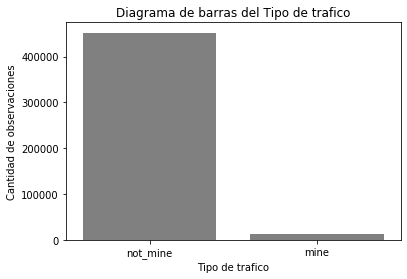

In [609]:
ax = sns.countplot(x='type', data=data, color='gray')
ax.set_title("Diagrama de barras del Tipo de trafico")
ax.set_xlabel('Tipo de trafico')
ax.set_ylabel('Cantidad de observaciones')

In [610]:
print(colored(f'Hacemos una copia del conjunto de datos original, para conservar la integridad de los datos originales', attrs=['bold']))
dataOr = data

Hacemos una copia del conjunto de datos original, para conservar la integridad de los datos originales


<font color="Red"><b><h2> Análisis</h2> </font>
El conjunto de datos A como se aprecia no esta balanceada, esto es debido a que en un principio se trato de balancear el conjunto de datos B que tiene trafico minero no identificado, por tal razón el conjunto benigno se le añadió más registros. **Para remediar lo anterior, agrupare de manera pseudoaletoria registros no mineros con la finalidad de balancear el conjunto de datos A**.

In [611]:
data_M = data[data['type'] == 'mine']
data_NM = data[data['type'] == 'not_mine']
dataNM_i = list(data_NM.index)
random.shuffle(dataNM_i)
ind_G = dataNM_i[0:data_M.shape[0]]

In [612]:
print(colored(f'Concatenamos', attrs=['bold']))
data_agrupada = data_NM[data_NM.index.isin(ind_G)]
data = pd.concat([data_agrupada,data_M], axis=0)
print(colored(f'Genero un rango de valores', attrs=['bold']))
indices = list(data.index)
print(colored(f'El rango de valores se le aplico aleatoriedad de manera pseudoaleatoria', attrs=['bold']))
random.shuffle(indices)
print(colored(f'Reacomodo los registros del conjunto con los indices aleatorios', attrs=['bold']))
data = data.reindex(indices)
data.head()

Concatenamos
Genero un rango de valores
El rango de valores se le aplico aleatoriedad de manera pseudoaleatoria
Reacomodo los registros del conjunto con los indices aleatorios


,index,References,ts,te,td,sa,da,sp,dp,pr,...,mpls10,cl,sl,al,ra,eng,exid,tr,cryptocurrency,type
420228,77204,264-csves/0.csv,2020-09-11 18:07:45,2020-09-11 18:10:46,180.728,192.168.0.13,159.127.41.204,57160,443,TCP,...,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,0.0,1969-12-31 19:00:00.000,Does_not_have,not_mine
193858,260246,759-csves/1.csv,2020-09-16 21:57:42,2020-09-16 21:57:42,0.000,192.168.0.13,192.168.0.1,42055,53,UDP,...,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,0.0,1969-12-31 19:00:00.000,Does_not_have,not_mine
107969,8053,65-csves/3.csv,2019-04-07 15:30:30,2019-04-07 15:32:20,110.005,192.168.1.99,172.65.207.106,58780,4444,TCP,...,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,0.0,1969-12-31 19:00:00.000,Etherium,mine
8524,2927,9-csves/18.csv,2019-04-05 04:08:00,2019-04-05 04:08:26,26.570,172.65.207.106,192.168.1.99,4444,64790,TCP,...,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,0.0,1969-12-31 19:00:00.000,Etherium,mine
147592,138179,434-csves/1.csv,2020-09-13 19:16:30,2020-09-13 19:16:30,0.000,192.168.0.13,192.168.0.1,58998,53,UDP,...,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,0.0,1969-12-31 19:00:00.000,Does_not_have,not_mine


Text(0, 0.5, 'Cantidad de observaciones')

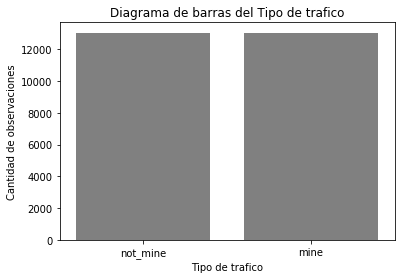

In [613]:
ax = sns.countplot(x='type', data=data, color='gray')
ax.set_title("Diagrama de barras del Tipo de trafico")
ax.set_xlabel('Tipo de trafico')
ax.set_ylabel('Cantidad de observaciones')

In [614]:
print(colored(f'El conjunto de datos agrupados quedo con {data.shape[0]} registros, con respecto al original perdimos un {(data.shape[0]/dataOr.shape[0])*100}% con respecto al conjunto de datos original. ', attrs=['bold']))

El conjunto de datos agrupados quedo con 26064 registros, con respecto al original perdimos un 5.605450603902137% con respecto al conjunto de datos original. 


# Inspección de datos no agrupados

### Datos categoricos 

No tengo en cuenta a 'references', ya que solo hace referencia a los nombres de los flujos. La moda(top) indica que hay elementos con la misma referencia, dado que concatenamos varios registros de diferentes conjuntos de datos, pero no significa que los registros sean repetidos.

In [615]:
print(colored(f'Variables categoricas', attrs=['bold']))
data[data_object].describe().T

Variables categoricas


,count,unique,top,freq
References,26064,3086,1033-csves/1.csv,131
ts,26064,18168,2020-09-15 07:53:42,10
te,26064,19395,2020-09-19 12:42:19,9
sa,26064,1938,192.168.0.13,6346
da,26064,1925,192.168.0.13,6298
pr,26064,4,TCP,22667
flg,26064,18,...AP...,11717
nh,26064,1,0.0.0.0,26064
nhb,26064,1,0.0.0.0,26064
ismc,26064,1,00:00:00:00:00:00,26064


In [616]:
print(colored(f'Agregue el indicador de Moda de mis variables a mi tabla de resumen', attrs=['bold']))

summary_descriptivo('type','Mo',data['type'].mode()[0])
summary_descriptivo('pr','Mo',data['pr'].mode()[0])
summary_descriptivo('flg','Mo',data['flg'].mode()[0])
summary_descriptivo('cryptocurrency','Mo',data['cryptocurrency'].mode()[0])

Agregue el indicador de Moda de mis variables a mi tabla de resumen


<font color="Red"><b><h2> Análisis</h2> </font>
- Las Hora de inicio (ts) y la hora final(te) tienen la misma moda, con la misma frecuencia.
- La dirección ip de origen (sa) y la dirección ip de origen (da) tienen la misma moda. Con frecuencias distintas
- La moda en el protocolo es TCP.
- La flag con mas iteraciones es __A__.
- Tanto el enrutador de salto y de salto BGP tienen la misma intrfaz para todos sus registros.
- La dirección Mac (idmc) de entrada y la dirección mac(odmc) no fueron registradas por la herramienta

### Datos continuos

In [617]:
print(colored(f'Variables continuas', attrs=['bold']))
data[data_numeric_float].describe().T

Variables continuas


,count,mean,std,min,25%,50%,75%,max
td,26064.0,77.308487,131.594984,0.0,0.08,19.9915,81.78975,599.533
fwd,26064.0,0.000000,0.000000,0.0,0.00,0.0000,0.00000,0.000
stos,26064.0,0.000000,0.000000,0.0,0.00,0.0000,0.00000,0.000
opkt,26064.0,0.000000,0.000000,0.0,0.00,0.0000,0.00000,0.000
obyt,26064.0,0.000000,0.000000,0.0,0.00,0.0000,0.00000,0.000
in,26064.0,0.000000,0.000000,0.0,0.00,0.0000,0.00000,0.000
out,26064.0,0.000000,0.000000,0.0,0.00,0.0000,0.00000,0.000
sas,26064.0,0.000000,0.000000,0.0,0.00,0.0000,0.00000,0.000
das,26064.0,0.000000,0.000000,0.0,0.00,0.0000,0.00000,0.000
smk,26064.0,0.000000,0.000000,0.0,0.00,0.0000,0.00000,0.000


<font color="Red"><b><h2> Análisis</h2> </font>

- La variable de tiempo es la unica variable, cuyo valor es distinto a 0
- La mayoria de los datos se encuentran entre el cuartil 2 y el cuartil 3

### Datos discretos

In [641]:
print(colored(f'Variables continuas', attrs=['bold']))
data[data_numeric_int].describe().T

Variables continuas


,count,mean,std,min,25%,50%,75%,max
index,26064.0,114761.497084,143983.346409,0.0,3514.75,9835.5,228442.5,451994.0
sp,26064.0,27100.080034,25513.337571,0.0,443.00,14444.0,55582.0,65442.0
dp,26064.0,26557.700698,25547.722942,53.0,1900.00,4444.0,55582.0,64790.0
ipkt,26064.0,29.279312,154.502410,1.0,2.00,7.0,20.0,8849.0
ibyt,26064.0,12246.164940,179058.416000,16.0,80.00,547.0,2996.0,6917225.0


<font color="Red"><b><h2> Análisis</h2> </font>

- No tomo encuenta la columna index, puesto que solo hace referencia a los indices
- Puerto de origen (sp) tiene la mayoria de datos distribuidos en el segundo y tercer cuartil
- Puerto de destino (dp) tiene la mayoria de los datos en el primer y tercer cuartil, mayoritariamente en el tercero
- El flujo de paquetes parece tener la mayoria de datos por encima del tercer cuartil
- Flujo de bytes tambien parece tener la mayoria de datos por encima del tercer cuartil

# Datos atipicos

In [619]:
data_numeric_int_list = ['sp', 'dp', 'ipkt', 'ibyt']
name = ['Puerto origen', 'Puerto destino','Paquetes de entrada','Bytes de entrada']

In [620]:
def box_plot(x,name):
    plt.figure(figsize=(12,5))
    ax = plt.subplot()
    ax = sns.boxplot(x=data[x], color='gray')
    ax.set_title(f'Diagrama de cajas de {name}',size=20)
    ax.set_xlabel(name,size=15)

### Variables discretas

Hay 0 valores atipicos en el limite superior
Hay 0 valores atipicos en el limite inferior
Hay 0.0% datos atipicos


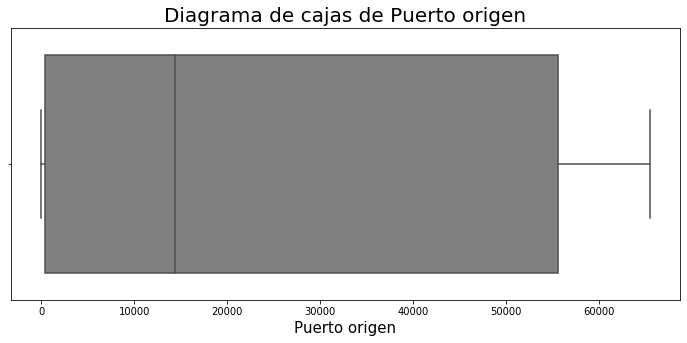

In [621]:
m = data_numeric_int_list[0]
box_plot(m,name[0])
q1 = data[m].quantile(0.25)
q3 = data[m].quantile(0.75)
q2 = data[m].quantile(0.5)
ric = q3-q1
borde_s = q3 + 1.5*ric
borde_i = q1-1.5*ric
atip_s = data[data[m]>borde_s].shape[0]
atip_i = data[data[m]<borde_i].shape[0]
porc = ((atip_s+atip_i)/data[m].shape[0]) * 100


summary_descriptivo(m,'Q1',q1)
summary_descriptivo(m,'Q2',q2)
summary_descriptivo(m,'Q3',q3)
summary_descriptivo(m,'Ls',borde_s)
summary_descriptivo(m,'Li',borde_i)
summary_descriptivo(m,'RIC',ric)
summary_descriptivo(m,'Outliers', (atip_i+atip_s))
summary_descriptivo(m,'per_out',porc)


print(colored(f'Hay {atip_s} valores atipicos en el limite superior', attrs=['bold']))
print(colored(f'Hay {atip_i} valores atipicos en el limite inferior', attrs=['bold']))
print(colored(f'Hay {porc}% datos atipicos', attrs=['bold']))

Hay 0 valores atipicos en el limite superior
Hay 0 valores atipicos en el limite inferior
Hay 0.0% datos atipicos


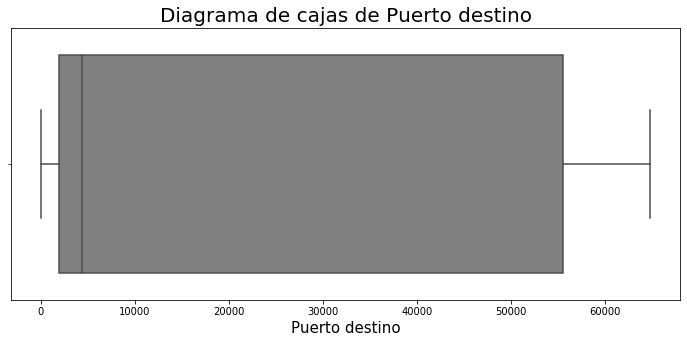

In [622]:
m = data_numeric_int_list[1]
box_plot(m,name[1])
q1 = data[m].quantile(0.25)
q3 = data[m].quantile(0.75)
ric = q3-q1
borde_s = q3 + 1.5*ric
borde_i = q1-1.5*ric
atip_s = data[data[m]>borde_s].shape[0]
atip_i = data[data[m]<borde_i].shape[0]
porc = ((atip_s+atip_i)/data[m].shape[0]) * 100 

summary_descriptivo(m,'Q1',q1)
summary_descriptivo(m,'Q2',q2)
summary_descriptivo(m,'Q3',q3)
summary_descriptivo(m,'Ls',borde_s)
summary_descriptivo(m,'Li',borde_i)
summary_descriptivo(m,'RIC',ric)
summary_descriptivo(m,'Outliers', (atip_i+atip_s))
summary_descriptivo(m,'per_out',porc)

print(colored(f'Hay {atip_s} valores atipicos en el limite superior', attrs=['bold']))
print(colored(f'Hay {atip_i} valores atipicos en el limite inferior', attrs=['bold']))
print(colored(f'Hay {porc}% datos atipicos', attrs=['bold']))

Hay 2333 valores atipicos en el limite superior
Hay 0 valores atipicos en el limite inferior
Hay 8.951043585021486% datos atipicos


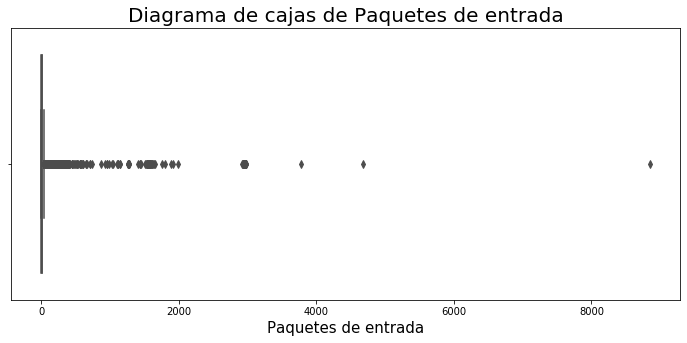

In [623]:
m = data_numeric_int_list[2]
box_plot(m,name[2])
q1 = data[m].quantile(0.25)
q3 = data[m].quantile(0.75)
ric = q3-q1
borde_s = q3 + 1.5*ric
borde_i = q1-1.5*ric
atip_s = data[data[m]>borde_s].shape[0]
atip_i = data[data[m]<borde_i].shape[0]
porc = ((atip_s+atip_i)/data[m].shape[0]) * 100 

summary_descriptivo(m,'Q1',q1)
summary_descriptivo(m,'Q2',q2)
summary_descriptivo(m,'Q3',q3)
summary_descriptivo(m,'Ls',borde_s)
summary_descriptivo(m,'Li',borde_i)
summary_descriptivo(m,'RIC',ric)
summary_descriptivo(m,'Outliers', (atip_i+atip_s))
summary_descriptivo(m,'per_out',porc)

print(colored(f'Hay {atip_s} valores atipicos en el limite superior', attrs=['bold']))
print(colored(f'Hay {atip_i} valores atipicos en el limite inferior', attrs=['bold']))
print(colored(f'Hay {porc}% datos atipicos', attrs=['bold']))

Hay 3565 valores atipicos en el limite superior
Hay 0 valores atipicos en el limite inferior
Hay 13.677869858809085% datos atipicos


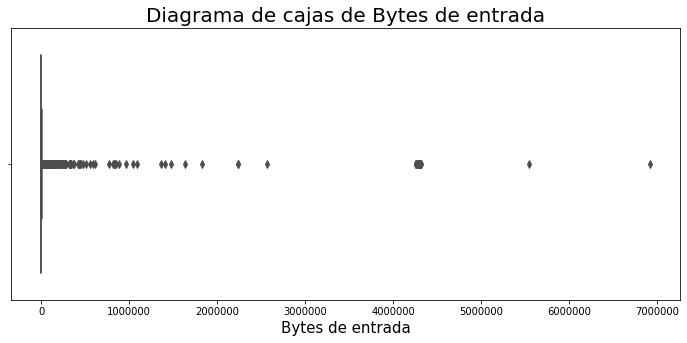

In [624]:
m = data_numeric_int_list[3]
box_plot(m,name[3])
q1 = data[m].quantile(0.25)
q3 = data[m].quantile(0.75)
ric = q3-q1
borde_s = q3 + 1.5*ric
borde_i = q1-1.5*ric
atip_s = data[data[m]>borde_s].shape[0]
atip_i = data[data[m]<borde_i].shape[0]
porc = ((atip_s+atip_i)/data[m].shape[0]) * 100 

summary_descriptivo(m,'Q1',q1)
summary_descriptivo(m,'Q2',q2)
summary_descriptivo(m,'Q3',q3)
summary_descriptivo(m,'Ls',borde_s)
summary_descriptivo(m,'Li',borde_i)
summary_descriptivo(m,'RIC',ric)
summary_descriptivo(m,'Outliers', (atip_i+atip_s))
summary_descriptivo(m,'per_out',porc)

print(colored(f'Hay {atip_s} valores atipicos en el limite superior', attrs=['bold']))
print(colored(f'Hay {atip_i} valores atipicos en el limite inferior', attrs=['bold']))
print(colored(f'Hay {porc}% datos atipicos', attrs=['bold']))

In [625]:
data_numeric_float_list = ['td']
name = ['Duración del flujo']

### Variable continua

Hay 3548 valores atipicos en el limite superior
Hay 0 valores atipicos en el limite inferior
Hay 13.612645794966237% datos atipicos


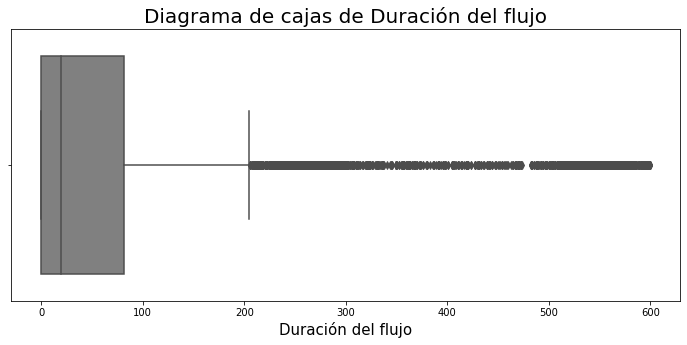

In [626]:
m = data_numeric_float_list[0]
box_plot(m,name[0])
q1 = data[m].quantile(0.25)
q3 = data[m].quantile(0.75)
ric = q3-q1
borde_s = q3 + 1.5*ric
borde_i = q1-1.5*ric
atip_s = data[data[m]>borde_s].shape[0]
atip_i = data[data[m]<borde_i].shape[0]
porc = ((atip_s+atip_i)/data[m].shape[0]) * 100 

summary_descriptivo(m,'Q1',q1)
summary_descriptivo(m,'Q2',q2)
summary_descriptivo(m,'Q3',q3)
summary_descriptivo(m,'Ls',borde_s)
summary_descriptivo(m,'Li',borde_i)
summary_descriptivo(m,'RIC',ric)
summary_descriptivo(m,'Outliers', (atip_i+atip_s))
summary_descriptivo(m,'per_out',porc)

print(colored(f'Hay {atip_s} valores atipicos en el limite superior', attrs=['bold']))
print(colored(f'Hay {atip_i} valores atipicos en el limite inferior', attrs=['bold']))
print(colored(f'Hay {porc}% datos atipicos', attrs=['bold']))

# Análisis datos Agrupados

### Datos categoricos

- No tengo en cuenta a las variables 'nh', 'nhb', 'ismc', 'odmc', 'idmc', 'osmc', 'mpls1', 'mpls2', 'mpls3', 'mpls4', 'mpls5', 'mpls6', 'mpls7', 'mpls8', 'mpls9', 'mpls10', 'ra', 'eng' y 'tr' en esta etapa del análisis, puesto que solamente hay un valor y es el mismo para todos los registros.

In [627]:
data_object_list = ['pr','flg', 'cryptocurrency', 'type']
tables_frequency_cualitative = []
namess = ['Protocolo','Banderas','Criptomonedas','Tipo']
for j, i in enumerate(data_object_list):
    tables_frequency_cualitative.append(made_frequency_table_B(i, data,namess[j]))

Tabla de frecuencia Protocolo


,Protocolo,ni,fi,Ni,Fi
0,TCP,22667,0.86967,22667,0.86967
1,UDP,3383,0.1298,26050,0.99947
2,ICMP6,9,0.00035,26059,0.99982
3,ICMP,5,0.00019,26064,1.00001
5,Total,26064,,,


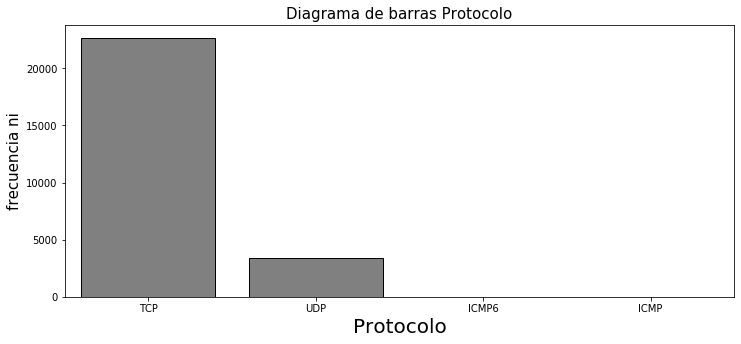

TCP      22667
UDP       3383
ICMP6        9
ICMP         5
Name: pr, dtype: int64
El protocolo con mas observaciones (Moda) en el conjunto de datos es el TCP con 22667 registros.


In [628]:
print(colored(f'Tabla de frecuencia {namess[0]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_cualitative[0])
display(table_f)
bar_plot(data_object_list[0],namess[0])
v = data[data_object_list[0]].value_counts()

print(v)
print(colored(f'El protocolo con mas observaciones (Moda) en el conjunto de datos es el {v.index[0]} con {v[0]} registros.',attrs=['bold']))

Tabla de frecuencia Banderas


,Banderas,ni,fi,Ni,Fi
0,...APRS.,11717,0.44955,11717,0.44955
1,........,4767,0.1829,16484,0.63245
2,...AP...,3397,0.13033,19881,0.76278
3,...A....,1584,0.06077,21465,0.82355
4,...AP.SF,1502,0.05763,22967,0.88118
5,...A...F,1073,0.04117,24040,0.92235
6,...AP..F,927,0.03557,24967,0.95792
7,......S.,286,0.01097,25253,0.96889
8,...AP.S.,243,0.00932,25496,0.97821
9,...A.R.F,226,0.00867,25722,0.98688


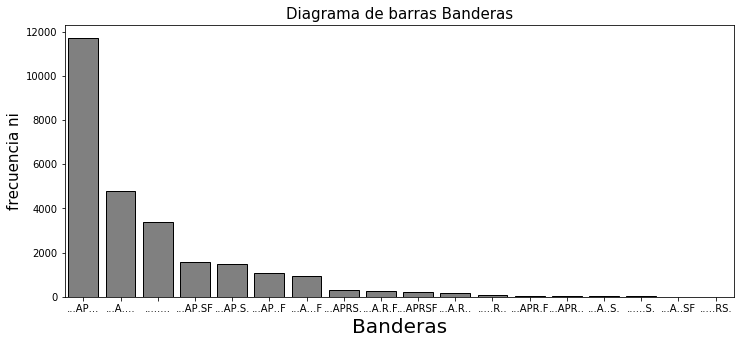

...AP...    11717
...A....     4767
........     3397
...AP.SF     1584
...AP.S.     1502
...AP..F     1073
...A...F      927
...APRS.      286
...A.R.F      243
...APRSF      226
...A.R..      151
.....R..       72
...APR.F       37
...APR..       29
...A..S.       23
......S.       15
...A..SF       13
.....RS.        2
Name: flg, dtype: int64
El protocolo con mas observaciones (Moda) en el conjunto de datos es el ...AP... con 11717 registros.


In [629]:
print(colored(f'Tabla de frecuencia {namess[1]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_cualitative[1])
display(table_f)
bar_plot(data_object_list[1],namess[1])
v = data[data_object_list[1]].value_counts()
print(v)
print(colored(f'El protocolo con mas observaciones (Moda) en el conjunto de datos es el {v.index[0]} con {v[0]} registros.',attrs=['bold']))

Tabla de frecuencia Criptomonedas


,Criptomonedas,ni,fi,Ni,Fi
0,Does_not_have,13032,0.5,13032,0.5
1,Etherium,10145,0.38923,23177,0.88923
2,Bitcash,987,0.03787,24164,0.9271
3,Litecoin,761,0.0292,24925,0.9563
4,Bitcoin,745,0.02858,25670,0.98488
5,Monero,394,0.01512,26064,1
7,Total,26064,,,


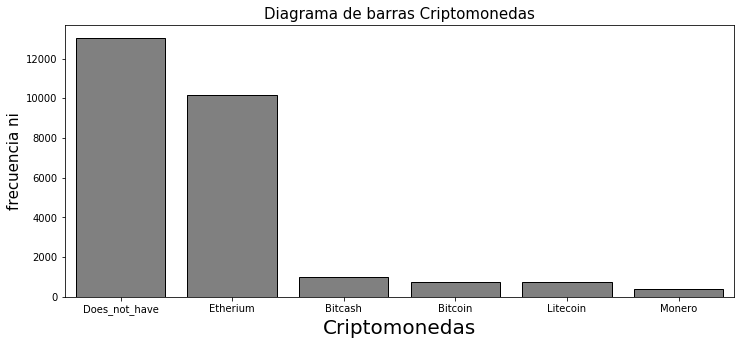

Does_not_have    13032
Etherium         10145
Bitcash            987
Bitcoin            761
Litecoin           745
Monero             394
Name: cryptocurrency, dtype: int64
El protocolo con mas observaciones (Moda) en el conjunto de datos es el Does_not_have con 13032 registros.


In [630]:
print(colored(f'Tabla de frecuencia {namess[2]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_cualitative[2])
display(table_f)
bar_plot(data_object_list[2],namess[2])
v = data[data_object_list[2]].value_counts()
print(v)
print(colored(f'El protocolo con mas observaciones (Moda) en el conjunto de datos es el {v.index[0]} con {v[0]} registros.',attrs=['bold']))

Tabla de frecuencia Tipo


,Tipo,ni,fi,Ni,Fi
0,not_mine,13032,0.5,13032,0.5
1,mine,13032,0.5,26064,1
3,Total,26064,,,


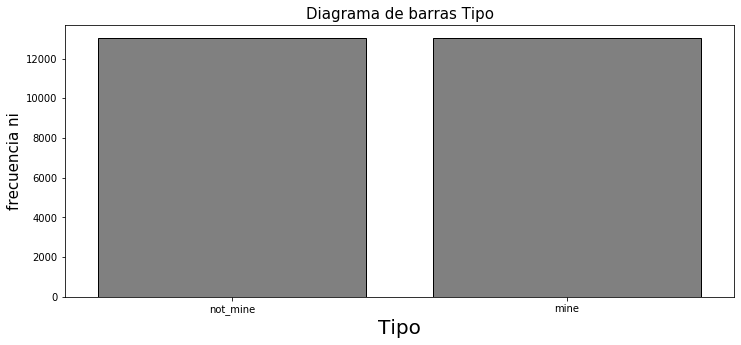

not_mine    13032
mine        13032
Name: type, dtype: int64
El protocolo con mas observaciones (Moda) en el conjunto de datos es el not_mine con 13032 registros.


In [631]:
print(colored(f'Tabla de frecuencia {namess[3]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_cualitative[3])
display(table_f)
bar_plot(data_object_list[3],namess[3])
v = data[data_object_list[3]].value_counts()
print(v)
print(colored(f'El protocolo con mas observaciones (Moda) en el conjunto de datos es el {v.index[0]} con {v[0]} registros.',attrs=['bold']))

### Datos continuos

Las variables 'fwd', 'stos', 'opkt', 'obyt', 'in', 'out', 'sas', 'das', 'smk', 'dmk', 'dtos', 'dir', 'svln', 'dvln', 'cl', 'sl','al' y 'exid' son descartadas para esta etapa del analisis exploratorio, puesto que su valor es 0 en sus registros.

In [632]:
data_numeric_float_list = ['td']
name_f = ['Duración del flujo']
tables_frequency_fl = []
for j, i in enumerate(data_numeric_float_list):
    tables_frequency_fl.append(made_frequency_table_A(i, data,1, name_f[j]))

In [633]:
m = intervals_class(data.shape[0])
m = int(np.rint(np.min(m)))
m

15

Tabla de frecuencia de Duración del flujo


,Duración del flujo,ni,fi,Ni,Fi,Xí
0,"(0.0, 39.96887)",15421,0.591659,15421,0.591659,19.9844
1,"(39.96887, 79.93774)",4060,0.15577,19481,0.747429,59.9533
2,"(79.93774, 119.90661)",1553,0.0595841,21034,0.807014,99.9222
3,"(119.90661, 159.87548)",897,0.0344153,21931,0.841429,139.891
4,"(159.87548, 199.84435)",561,0.0215239,22492,0.862953,179.86
5,"(199.84435, 239.81322)",293,0.0112416,22785,0.874194,219.829
6,"(239.81322, 279.78209)",1354,0.051949,24139,0.926143,259.798
7,"(279.78209, 319.75096)",539,0.0206799,24678,0.946823,299.767
8,"(319.75096, 359.71983)",83,0.00318447,24761,0.950008,339.735
9,"(359.71983, 399.6887)",64,0.00245549,24825,0.952463,379.704


El coeficiente de asimetria es de 2.4389535120299604, la distribución es Asimetrica con cola hacia la derecha.
El coeficiente de curtosis es de 5.681501176484128, la distribución es Platicúrtica.


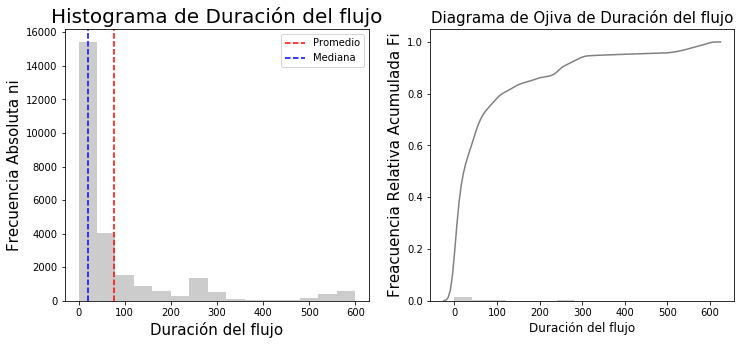

In [634]:
print(colored(f'Tabla de frecuencia de {name_f[0]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_fl[0])
display(table_f)
hist_Ogive_plot(data_numeric_float_list[0],m,name_f[0])
fila = data[data_numeric_float_list[0]]
asimetria, curtosis, message, message_2 = is_asimetric_curtosis(fila)
print(colored(f'El coeficiente de asimetria es de {asimetria}, la distribución es {message}.',attrs=['bold']))
print(colored(f'El coeficiente de curtosis es de {curtosis}, la distribución es {message_2}.',attrs=['bold']))

### Datos discretos

In [635]:
data_numeric_int_list = ['sp', 'dp', 'ipkt', 'ibyt']        
tables_frequency_int = []
name = ['Puerto origen', 'Puerto destino','Paquetes de entrada','Bytes de entrada']
for j,i in enumerate(data_numeric_int_list):
    tables_frequency_int.append(made_frequency_table_A(i, data,1,name[j]))

Tabla de frecuencia de Puerto origen


,Duración del flujo,ni,fi,Ni,Fi,Xí
0,"(0.0, 39.96887)",15421,0.591659,15421,0.591659,19.9844
1,"(39.96887, 79.93774)",4060,0.15577,19481,0.747429,59.9533
2,"(79.93774, 119.90661)",1553,0.0595841,21034,0.807014,99.9222
3,"(119.90661, 159.87548)",897,0.0344153,21931,0.841429,139.891
4,"(159.87548, 199.84435)",561,0.0215239,22492,0.862953,179.86
5,"(199.84435, 239.81322)",293,0.0112416,22785,0.874194,219.829
6,"(239.81322, 279.78209)",1354,0.051949,24139,0.926143,259.798
7,"(279.78209, 319.75096)",539,0.0206799,24678,0.946823,299.767
8,"(319.75096, 359.71983)",83,0.00318447,24761,0.950008,339.735
9,"(359.71983, 399.6887)",64,0.00245549,24825,0.952463,379.704


El coeficiente de asimetria es de 0.13446519855805517, la distribución es Asimetrica con cola hacia la derecha.
El coeficiente de curtosis es de -1.8275957750583731, la distribución es Platicúrtica.


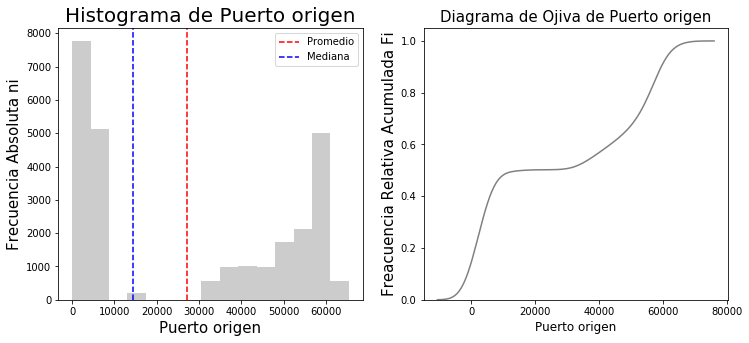

In [636]:
print(colored(f'Tabla de frecuencia de {name[0]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_fl[0])
display(table_f)
hist_Ogive_plot(data_numeric_int_list[0],m,name[0])
fila = data[data_numeric_int_list[0]]
asimetria, curtosis, message, message_2 = is_asimetric_curtosis(fila)
print(colored(f'El coeficiente de asimetria es de {asimetria}, la distribución es {message}.',attrs=['bold']))
print(colored(f'El coeficiente de curtosis es de {curtosis}, la distribución es {message_2}.',attrs=['bold']))

Tabla de frecuencia de Puerto destino


,Puerto destino,ni,fi,Ni,Fi,Xí
0,"(53, 4368.8)",8026,0.307934,8026,0.307934,2210.9
1,"(4368.8, 8684.6)",5205,0.199701,13231,0.507635,6526.7
2,"(8684.6, 13000.4)",2,7.67342e-05,13233,0.507712,10842.5
3,"(13000.4, 17316.2)",197,0.00755832,13430,0.51527,15158.3
4,"(17316.2, 21632.0)",0,0,13430,0.51527,19474.1
5,"(21632.0, 25947.8)",0,0,13430,0.51527,23789.9
6,"(25947.8, 30263.6)",0,0,13430,0.51527,28105.7
7,"(30263.6, 34579.4)",407,0.0156154,13837,0.530886,32421.5
8,"(34579.4, 38895.2)",961,0.0368708,14798,0.567756,36737.3
9,"(38895.2, 43211.0)",939,0.0360267,15737,0.603783,41053.1


El coeficiente de asimetria es de 0.17755373532754987, la distribución es Asimetrica con cola hacia la derecha.
El coeficiente de curtosis es de -1.822143925554534, la distribución es Platicúrtica.


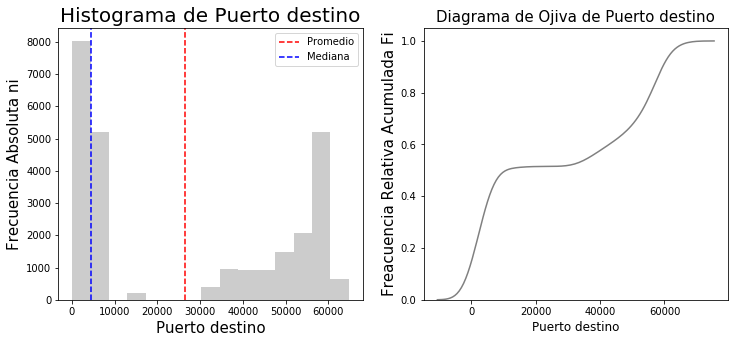

In [637]:
print(colored(f'Tabla de frecuencia de {name[1]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_int[1])
display(table_f)
hist_Ogive_plot(data_numeric_int_list[1],m,name[1])
fila = data[data_numeric_int_list[1]]
asimetria, curtosis, message, message_2 = is_asimetric_curtosis(fila)
print(colored(f'El coeficiente de asimetria es de {asimetria}, la distribución es {message}.',attrs=['bold']))
print(colored(f'El coeficiente de curtosis es de {curtosis}, la distribución es {message_2}.',attrs=['bold']))

Tabla de frecuencia de Paquetes de entrada


,Paquetes de entrada,ni,fi,Ni,Fi,Xí
0,"(1, 590.86667)",25960,0.99601,25960,0.99601,295.933
1,"(590.86667, 1180.73334)",21,0.000805709,25981,0.996816,885.8
2,"(1180.73334, 1770.60001)",37,0.00141958,26018,0.998235,1475.67
3,"(1770.60001, 2360.46668)",4,0.000153468,26022,0.998389,2065.53
4,"(2360.46668, 2950.33335)",9,0.000345304,26031,0.998734,2655.4
5,"(2950.33335, 3540.20002)",30,0.00115101,26061,0.999885,3245.27
6,"(3540.20002, 4130.06669)",1,3.83671e-05,26062,0.999923,3835.13
7,"(4130.06669, 4719.93336)",1,3.83671e-05,26063,0.999962,4425
8,"(4719.93336, 5309.80003)",0,0,26063,0.999962,5014.87
9,"(5309.80003, 5899.6667)",0,0,26063,0.999962,5604.73


El coeficiente de asimetria es de 20.76186541580551, la distribución es Asimetrica con cola hacia la derecha.
El coeficiente de curtosis es de 659.191012961948, la distribución es Leptocúrtica.


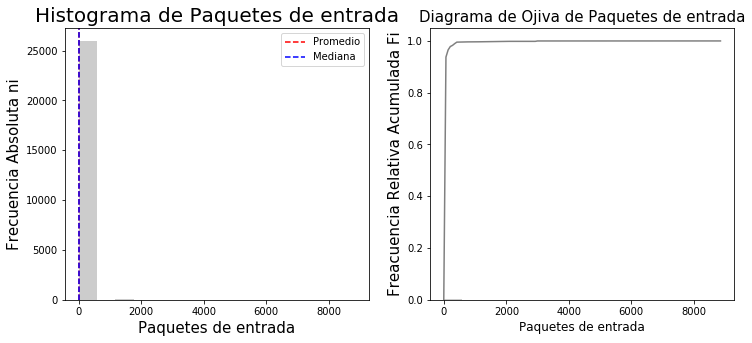

In [638]:
print(colored(f'Tabla de frecuencia de {name[2]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_int[2])
display(table_f)
hist_Ogive_plot(data_numeric_int_list[2],m,name[2])
fila = data[data_numeric_int_list[2]]
asimetria, curtosis, message, message_2 = is_asimetric_curtosis(fila)
print(colored(f'El coeficiente de asimetria es de {asimetria}, la distribución es {message}.',attrs=['bold']))
print(colored(f'El coeficiente de curtosis es de {curtosis}, la distribución es {message_2}.',attrs=['bold']))

Tabla de frecuencia de Bytes de entrada


,Bytes de entrada,ni,fi,Ni,Fi,Xí
0,"(16, 461163.26667)",26001,0.997583,26001,0.997583,230590
1,"(461163.26667, 922310.53334)",11,0.000422038,26012,0.998005,691737
2,"(922310.53334, 1383457.80001)",4,0.000153468,26016,0.998158,1.15288e+06
3,"(1383457.80001, 1844605.06668)",4,0.000153468,26020,0.998312,1.61403e+06
4,"(1844605.06668, 2305752.33335)",2,7.67342e-05,26022,0.998389,2.07518e+06
5,"(2305752.33335, 2766899.60002)",1,3.83671e-05,26023,0.998427,2.53633e+06
6,"(2766899.60002, 3228046.86669)",0,0,26023,0.998427,2.99747e+06
7,"(3228046.86669, 3689194.13336)",0,0,26023,0.998427,3.45862e+06
8,"(3689194.13336, 4150341.40003)",0,0,26023,0.998427,3.91977e+06
9,"(4150341.40003, 4611488.6667)",39,0.00149632,26062,0.999923,4.38092e+06


El coeficiente de asimetria es de 24.116409211166296, la distribución es Asimetrica con cola hacia la derecha.
El coeficiente de curtosis es de 607.2520896509432, la distribución es Leptocúrtica.


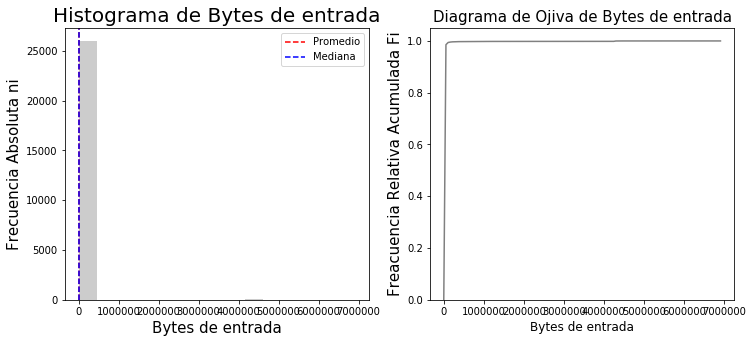

In [639]:
print(colored(f'Tabla de frecuencia de {name[3]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_int[3])
display(table_f)
hist_Ogive_plot(data_numeric_int_list[3],m,name[3])
fila = data[data_numeric_int_list[3]]
asimetria, curtosis, message, message_2 = is_asimetric_curtosis(fila)
print(colored(f'El coeficiente de asimetria es de {asimetria}, la distribución es {message}.',attrs=['bold']))
print(colored(f'El coeficiente de curtosis es de {curtosis}, la distribución es {message_2}.',attrs=['bold']))

<font color='red'><h1>Resumen</h1></font>

### Diccionario de datos
- $\overline{X}$ = Media Aritmetica
- Me: Mediana
- Mg: Media Geometrica
- Mo: Moda
- Fr: Frecuencia de la moda
- R: Rango
- Min: Minimo
- Max: Maximo
- $\S^{2}$: Varianza
- S: Desviación
- CV: Coeficiente de variación
- Q1: Cuartil 1
- Q2: Cuartil 2
- Q3: Cuartil 3
- Ls: Limite Superior
- Li: Limite Inferior
- RIC: Rango intercuartilico
- Outliers: Datos atipicos
- A: Coeficiente de simetria
- CK: Coeficiente de curtosis

In [643]:
features_No_Agrupadas.T

,type,pr,flg,cryptocurrency,td,sp,dp,ipkt,ibyt
X,0,0,0,0,0,0,0,0,0
Me,0,0,0,0,0,0,0,0,0
Mg,0,0,0,0,0,0,0,0,0
Mo,mine,TCP,...AP...,Does_not_have,0,0,0,0,0
Fr,0,0,0,0,0,0,0,0,0
R,0,0,0,0,0,0,0,0,0
Min,0,0,0,0,0,0,0,0,0
Max,0,0,0,0,0,0,0,0,0
§2,0,0,0,0,0,0,0,0,0
S,0,0,0,0,0,0,0,0,0


In [644]:
data.to_csv('DataA_Tratada.csv',index=False)